<a href="https://colab.research.google.com/github/2403a52030-sketch/NLP-LAB/blob/main/ML_LAB_4_2403A52030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Required Libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Load Dataset

In [ ]:
# Load salary dataset

df = pd.read_csv("/content/Salary_dataset.csv")

# Display dataset information
df.head()


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


Understand the Dataset

In [ ]:
# Check dataset shape
print("Dataset Shape:", df.shape)

# Check column names
print("Columns:", df.columns)

# Check for missing values
print("Missing values:\n", df.isnull().sum())


Dataset Shape: (30, 3)
Columns: Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')
Missing values:
 Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64


Define Independent (X) and Dependent (y) Variables

In [ ]:
# Independent variable (Years of Experience)
X = df.iloc[:, 0].values.reshape(-1, 1)

# Dependent variable (Salary)
y = df.iloc[:, 1].values

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (30, 1)
y shape: (30,)


Split Data into Training and Testing Sets

In [ ]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (24, 1)
Testing data size: (6, 1)


Create and Train Linear Regression Model

In [ ]:
# Create Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Display model parameters
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)


Slope (Coefficient): 0.3168045501551188
Intercept: 0.8522362978283367


Predict Salary Values

In [ ]:
# Predict salaries for test data
y_pred = model.predict(X_test)

# Compare actual and predicted values
comparison = pd.DataFrame({
    "Actual Salary": y_test,
    "Predicted Salary": y_pred
})

comparison.head()


,Actual Salary,Predicted Salary
0,9.7,9.405959
1,5.0,5.604305
2,8.3,8.138741
3,5.4,6.237914
4,3.3,3.386673


Evaluate the Model (MSE & R²)

In [ ]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# R-squared value
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared Value (R²):", r2)


Mean Squared Error (MSE): 0.1994294290325125
R-squared Value (R²): 0.963100891991723


Plot Regression Line

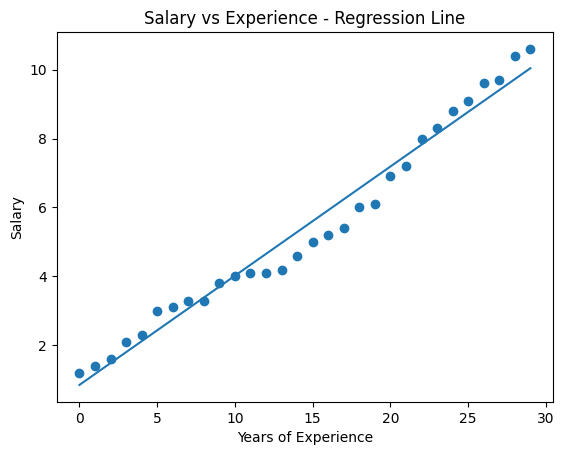

In [ ]:
plt.scatter(X, y)
plt.plot(X, model.predict(X))
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience - Regression Line")
plt.show()


Plot Actual vs Predicted Values

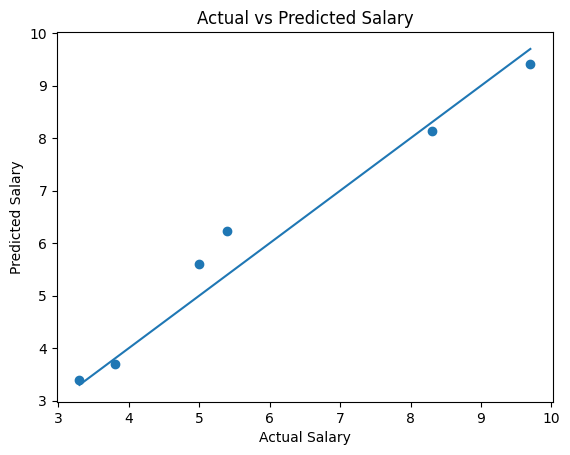

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")

# Reference diagonal line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])

plt.show()
